In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m

#Las dos líneas siguientes son para mostrar las tablas completas tanto en numpy como en pandas
np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None, "display.max_columns", None)

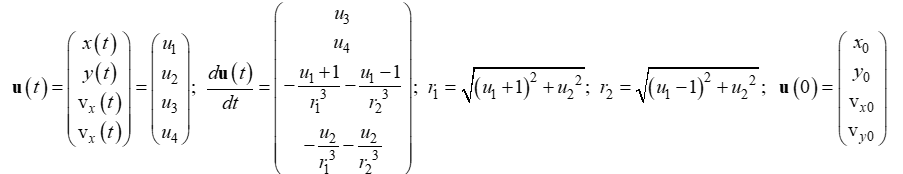

In [2]:
a = 0
b = 100 # Si b se aumenta/disminuye, cambian la cantidad de puntos de la trayectoria mostrados  
h = 0.007 # Tamaño de paso
t = np.arange(a, b+h, h) # +h para que termine en b
n = len(t)

In [3]:
# Definí funciones r1, r2, ax (du3/dt), ay (du4/dt) y energía.

#    Si elevaba algún término con numpy [ a**n ] me aparecía un error, en lugar de buscar el porqué del error, 
#    las potencias las hice con la librería math [ m.pow(a,n) ]

def r1(xx, yy):
    return np.sqrt(m.pow(xx+1,2) + m.pow(yy,2))
def r2(xx, yy):
    return np.sqrt(m.pow(xx-1,2) + m.pow(yy,2))
def ax(xx, yy):
    return -(xx+1)/(m.pow(r1(xx,yy),3)) - (xx-1)/(m.pow(r2(xx,yy),3))
def ay(xx, yy):
    return -(yy/(m.pow(r1(xx,yy),3)))-(yy/(m.pow(r2(xx,yy),3)))

def Energia(xx, yy, vxx, vyy):
    return (1/2)*(m.pow(vxx,2) + m.pow(vyy,2)) - 1/(r1(xx,yy)) - 1/(r2(xx,yy))
    

#Esto ya ni recuerdo bien qué es pero lo dejé aquí con markdown

def RK4(x0,y0,vx0,vy0):
    x = np.zeros(n);
    y = np.zeros(n);
    x[0] = x0;
    y[0] = y0;
    
    vx = np.zeros(n);
    vy = np.zeros(n);
    vx[0] = vx0;
    vy[0] = vy0;
     
    for i in range(n-1):
        k1 = h*ax(x[i],y[i])
        l1 = h*ay(x[i],y[i])
        k2 = h*ax(x[i]+k1/2, y[i]+l1/2)
        l2 = h*ay(x[i]+k1/2, y[i]+l1/2)
        k3 = h*ax(x[i]+k2/2, y[i]+l2/2)
        l3 = h*ay(x[i]+k2/2, y[i]+l2/2)
        k4 = h*ax(x[i]+k3, y[i]+l3)
        l4 = h*ay(x[i]+k3, y[i]+l3)

        vx[i+1] = vx[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        vy[i+1] = vy[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
    
        m1 = h*vx[i]
        m2 = h*vx[i]
        m3 = h*vx[i]
        m4 = h*vx[i]
        
        x[i+1] = x[i] + (1/6)*(m1 + 2*m2 + 2*m3 + m4)

        o1 = h*vy[i]
        o2 = h*vy[i]
        o3 = h*vy[i]
        o4 = h*vy[i]
        
        y[i+1] = y[i] + (1/6)*(o1 + 2*o2 + 2*o3 + o4)    
    
    plt.figure(figsize=(13,7))
    plt.scatter(x,y, s=10)
    plt.scatter(1,0, marker=(5, 1), s=100)
    plt.scatter(-1,0, marker=(5, 1), s=100)
    plt.show()

    return pd.DataFrame({'x': x}), pd.DataFrame({'y': y}), pd.DataFrame({'vx': vx}), pd.DataFrame({'vy': vy})


### Método RK4:

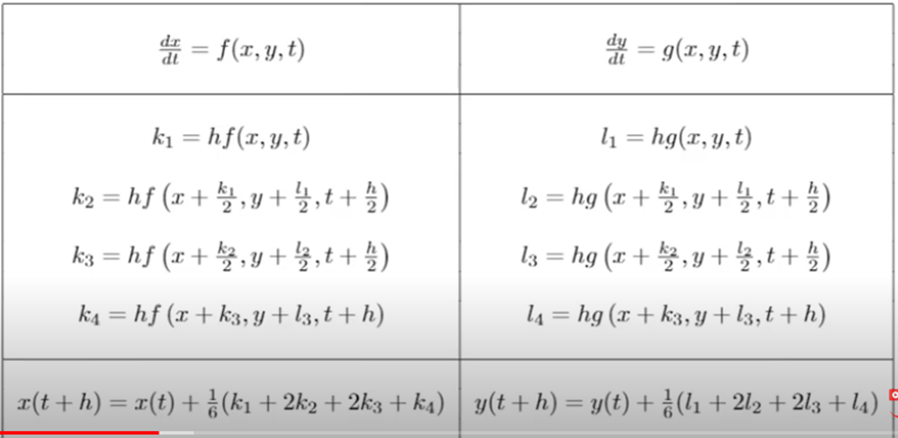

In [4]:
# Ahora mis dos intentos de Runge Kutta 4

# Este lo hice como aparece en la imagen anterior, RK4 para sist. de ec. dif

def RK4(x0,y0,vx0,vy0):
    x = np.zeros(n); # Arrays vacíos para posteriormente llenarlos
    y = np.zeros(n);
    x[0] = x0;
    y[0] = y0;
    
    vx = np.zeros(n);
    vy = np.zeros(n);
    vx[0] = vx0;
    vy[0] = vy0;
    
    E = np.zeros(n);
     
    for i in range(n-1):
        k1 = h*ax(x[i],y[i])
        l1 = h*ay(x[i],y[i])
        k2 = h*ax(x[i]+k1/2, y[i]+l1/2)
        l2 = h*ay(x[i]+k1/2, y[i]+l1/2)
        k3 = h*ax(x[i]+k2/2, y[i]+l2/2)
        l3 = h*ay(x[i]+k2/2, y[i]+l2/2)
        k4 = h*ax(x[i]+k3, y[i]+l3)
        l4 = h*ay(x[i]+k3, y[i]+l3)
        
    # En cada iteración encuentro vx, vy para el paso siguiente con RK4 y se guardan en el array. Lo mismo con x, y.
    
        vx[i+1] = vx[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        vy[i+1] = vy[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
        
        x[i+1] = x[i] + h*vx[i]
        y[i+1] = y[i] + h*vy[i] 
        
        E[i] = Energia(x[i], y[i], vx[i], vy[i]) 
    
    # Gráfico
    plt.figure(figsize=(13,7))
    plt.style.use('dark_background')
    plt.scatter(x,y, s=5, color="white")
    plt.scatter(1,0, marker=(5, 1), s=200, color="yellow") # Hice que en la gráfica las estrellas se vieran con size=200
    plt.scatter(-1,0, marker=(5, 1), s=200, color="yellow")
    plt.xlim(-6.5,6.5) # Límites de los ejes
    plt.ylim(-6.5,6.5)
    plt.show()

    #return pd.DataFrame({'E': Energía})
    #return pd.DataFrame({'x': x}), pd.DataFrame({'y': y}), pd.DataFrame({'vx': vx}), pd.DataFrame({'vy': vy})

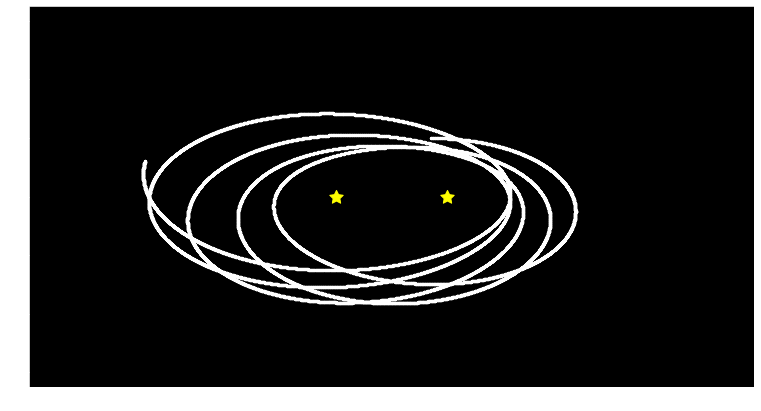

In [5]:
RK4(0.7, 2, 1, 0) 

In [6]:
# Los resultados con la forma en que apliqué RK4 en la función anterior no me convencieron tanto, por eso me enfoqué 
# más en la siguiente función. Todo es básicamente lo mismo, solo cambié la forma en que apliqué RK4.

def RK4_2(x0,y0,vx0,vy0):
    x = np.zeros(n);
    y = np.zeros(n);
    x[0] = x0;
    y[0] = y0;
    
    vx = np.zeros(n);
    vy = np.zeros(n);
    vx[0] = vx0;
    vy[0] = vy0;
    
    E = np.zeros(n);
    
    for i in range(n-1):
        k1 = h*ax(x[i], y[i])
        k2 = h*ax(x[i]+h/2, y[i]+(1/2)*k1*h)
        k3 = h*ax(x[i]+h/2, y[i]+(1/2)*k2*h)
        k4 = h*ax(x[i]+h, y[i]+k3*h)

        vx[i+1] = vx[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        l1 = h*ay(x[i], y[i])
        l2 = h*ay(x[i]+h/2, y[i]+(1/2)*l1*h)
        l3 = h*ay(x[i]+h/2, y[i]+(1/2)*l2*h)
        l4 = h*ay(x[i]+h, y[i]+l3*h)

        vy[i+1] = vy[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
        
        x[i+1] = x[i] + h*vx[i]
        y[i+1] = y[i] + h*vy[i] 
        
        E[i] = Energia(x[i], y[i], vx[i], vy[i])

    plt.figure(figsize=(13,7))
    plt.style.use('dark_background')
    plt.scatter(x,y, s=5, color="white")
    plt.scatter(1,0, marker=(5, 1), s=300, color="yellow")
    plt.scatter(-1,0, marker=(5, 1), s=300, color="yellow")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.show()
    
    return pd.DataFrame({'Energía': E})
    #return pd.DataFrame({'x': x}), pd.DataFrame({'y': y}), pd.DataFrame({'vx': vx}), pd.DataFrame({'vy': vy})

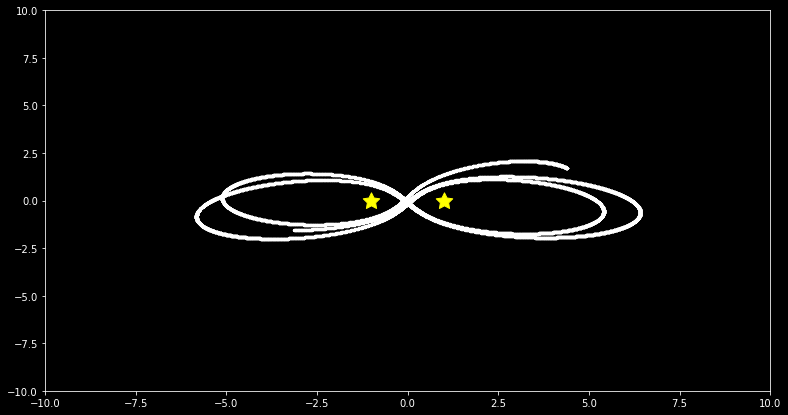

Energía
0     -0.399706
1     -0.399705
2     -0.399705
3     -0.399705
4     -0.399705
5     -0.399704
6     -0.399704
7     -0.399704
8     -0.399704
9     -0.399703
10    -0.399703
11    -0.399703
12    -0.399703
13    -0.399703
14    -0.399702
15    -0.399702
16    -0.399702
17    -0.399702
18    -0.399701
19    -0.399701
20    -0.399701
21    -0.399701
22    -0.399701
23    -0.399700
24    -0.399700
25    -0.399700
26    -0.399700
27    -0.399699
28    -0.399699
29    -0.399699
30    -0.399699
31    -0.399699
32    -0.399698
33    -0.399698
34    -0.399698
35    -0.399698
36    -0.399698
37    -0.399697
38    -0.399697
39    -0.399697
40    -0.399697
41    -0.399696
42    -0.399696
43    -0.399696
44    -0.399696
45    -0.399696
46    -0.399695
47    -0.399695
48    -0.399695
49    -0.399695
50    -0.399695
51    -0.399694
52    -0.399694
53    -0.399694
54    -0.399694
55    -0.399693
56    -0.399693
57    -0.399693
58    -0.399693
59    -0.399693
60    -0.399692
61    -0.399692
62    -0.399692
63    -0.399692
64    -0.399692
65    -0.399691
66    -0.399691
67    -0.399691
68    -0.399691
69    -0.399691
70    -0.399690
71    -0.399690
72    -0.399690
73    -0.399690
74    -0.399690
75    -0.399689
76    -0.399689
77    -0.399689
78    -0.399689
79    -0.399689
80    -0.399688
81    -0.399688
82    -0.399688
83    -0.399688
84    -0.399688
85    -0.399688
86    -0.399687
87    -0.399687
88    -0.399687
89    -0.399687
90    -0.399687
91    -0.399686
92    -0.399686
93    -0.399686
94    -0.399686
95    -0.399686
96    -0.399685
97    -0.399685
98    -0.399685
99    -0.399685
100   -0.399685
101   -0.399685
102   -0.399684
103   -0.399684
104   -0.399684
105   -0.399684
106   -0.399684
107   -0.399683
108   -0.399683
109   -0.399683
110   -0.399683
111   -0.399683
112   -0.399683
113   -0.399682
114   -0.399682
115   -0.399682
116   -0.399682
117   -0.399682
118   -0.399681
119   -0.399681
120   -0.399681
121   -0.399681
122   -0.399681
123   -0.399681
124   -0.399680
125   -0.399680
126   -0.399680
127   -0.399680
128   -0.399680
129   -0.399680
130   -0.399679
131   -0.399679
132   -0.399679
133   -0.399679
134   -0.399679
135   -0.399679
136   -0.399678
137   -0.399678
138   -0.399678
139   -0.399678
140   -0.399678
141   -0.399678
142   -0.399677
143   -0.399677
144   -0.399677
145   -0.399677
146   -0.399677
147   -0.399677
148   -0.399677
149   -0.399676
150   -0.399676
151   -0.399676
152   -0.399676
153   -0.399676
154   -0.399676
155   -0.399675
156   -0.399675
157   -0.399675
158   -0.399675
159   -0.399675
160   -0.399675
161   -0.399674
162   -0.399674
163   -0.399674
164   -0.399674
165   -0.399674
166   -0.399674
167   -0.399674
168   -0.399673
169   -0.399673
170   -0.399673
171   -0.399673
172   -0.399673
173   -0.399673
174   -0.399673
175   -0.399672
176   -0.399672
177   -0.399672
178   -0.399672
179   -0.399672
180   -0.399672
181   -0.399672
182   -0.399671
183   -0.399671
184   -0.399671
185   -0.399671
186   -0.399671
187   -0.399671
188   -0.399671
189   -0.399670
190   -0.399670
191   -0.399670
192   -0.399670
193   -0.399670
194   -0.399670
195   -0.399670
196   -0.399670
197   -0.399669
198   -0.399669
199   -0.399669
200   -0.399669
201   -0.399669
202   -0.399669
203   -0.399669
204   -0.399669
205   -0.399668
206   -0.399668
207   -0.399668
208   -0.399668
209   -0.399668
210   -0.399668
211   -0.399668
212   -0.399668
213   -0.399667
214   -0.399667
215   -0.399667
216   -0.399667
217   -0.399667
218   -0.399667
219   -0.399667
220   -0.399667
221   -0.399666
222   -0.399666
223   -0.399666
224   -0.399666
225   -0.399666
226   -0.399666
227   -0.399666
228   -0.399666
229   -0.399666
230   -0.399665
231   -0.399665
232   -0.399665
233   -0.399665
234   -0.399665
235   -0.399665
236   -0.399665
237   -0.399665
238   -0.399665
239   -0.399664
240   -0.399664
241   -0.399664
242   -0.399664
243   -0.399664
244   -0.399664
245   -0.399664
246   -0.399664
247   -0.399664
248   -0.399664
249   -0

In [7]:
#RK4_2(0.7, 0, 0, 2) 

#RK4_2(4.4, 5, -0.5, 0.2) 
#RK4_2(4.4, 1.7, -0.3, 0.5) 
#RK4_2(3.63, 2.2, -0.2, 0.2) 
RK4_2(4.4, 1.7, -0.2, 0.2) 
#RK4_2(4.5, 1.5, -0.42, 0.6) 
#RK4_2(3.5, 1.5, -0.42, 0.69) 

### Método de Euler:

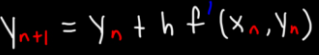

In [8]:
# Los resultados con la forma en que apliqué RK4 en la función anterior no me convencieron tanto, por eso me enfoqué 
# más en la siguiente función. Todo es básicamente lo mismo, solo cambié la forma en que apliqué RK4.

def Euler(x0,y0,vx0,vy0):
    x = np.zeros(n);
    y = np.zeros(n);
    x[0] = x0;
    y[0] = y0;
    
    vx = np.zeros(n);
    vy = np.zeros(n);
    vx[0] = vx0;
    vy[0] = vy0;
    
    E = np.zeros(n);
    
    for i in range(n-1):
        
        vx[i+1] = vx[i] + h*ax(x[i],y[i])
        vy[i+1] = vy[i] + h*ay(x[i],y[i])
        
        x[i+1] = x[i] + h*vx[i]
        y[i+1] = y[i] + h*vy[i] 
        
        E[i] = Energia(x[i], y[i], vx[i], vy[i])

    plt.figure(figsize=(13,7))
    plt.style.use('dark_background')
    plt.scatter(x,y, s=5, color="white")
    plt.scatter(1,0, marker=(5, 1), s=300, color="yellow")
    plt.scatter(-1,0, marker=(5, 1), s=300, color="yellow")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.show()
    
    return pd.DataFrame({'Energía': E})
    #return pd.DataFrame({'x': x}), pd.DataFrame({'y': y}), pd.DataFrame({'vx': vx}), pd.DataFrame({'vy': vy})

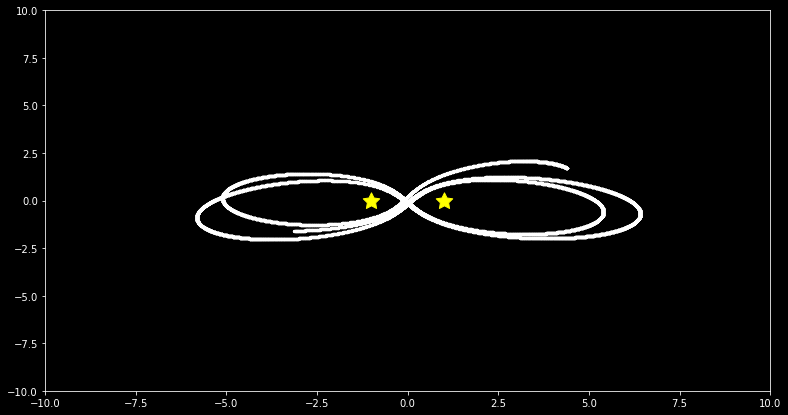

Energía
0     -0.399706
1     -0.399705
2     -0.399705
3     -0.399705
4     -0.399704
5     -0.399704
6     -0.399704
7     -0.399704
8     -0.399703
9     -0.399703
10    -0.399703
11    -0.399703
12    -0.399702
13    -0.399702
14    -0.399702
15    -0.399701
16    -0.399701
17    -0.399701
18    -0.399701
19    -0.399700
20    -0.399700
21    -0.399700
22    -0.399700
23    -0.399699
24    -0.399699
25    -0.399699
26    -0.399698
27    -0.399698
28    -0.399698
29    -0.399698
30    -0.399697
31    -0.399697
32    -0.399697
33    -0.399696
34    -0.399696
35    -0.399696
36    -0.399696
37    -0.399695
38    -0.399695
39    -0.399695
40    -0.399695
41    -0.399694
42    -0.399694
43    -0.399694
44    -0.399693
45    -0.399693
46    -0.399693
47    -0.399693
48    -0.399692
49    -0.399692
50    -0.399692
51    -0.399691
52    -0.399691
53    -0.399691
54    -0.399691
55    -0.399690
56    -0.399690
57    -0.399690
58    -0.399690
59    -0.399689
60    -0.399689
61    -0.399689
62    -0.399688
63    -0.399688
64    -0.399688
65    -0.399688
66    -0.399687
67    -0.399687
68    -0.399687
69    -0.399686
70    -0.399686
71    -0.399686
72    -0.399686
73    -0.399685
74    -0.399685
75    -0.399685
76    -0.399685
77    -0.399684
78    -0.399684
79    -0.399684
80    -0.399683
81    -0.399683
82    -0.399683
83    -0.399683
84    -0.399682
85    -0.399682
86    -0.399682
87    -0.399681
88    -0.399681
89    -0.399681
90    -0.399681
91    -0.399680
92    -0.399680
93    -0.399680
94    -0.399679
95    -0.399679
96    -0.399679
97    -0.399679
98    -0.399678
99    -0.399678
100   -0.399678
101   -0.399678
102   -0.399677
103   -0.399677
104   -0.399677
105   -0.399676
106   -0.399676
107   -0.399676
108   -0.399676
109   -0.399675
110   -0.399675
111   -0.399675
112   -0.399674
113   -0.399674
114   -0.399674
115   -0.399674
116   -0.399673
117   -0.399673
118   -0.399673
119   -0.399672
120   -0.399672
121   -0.399672
122   -0.399672
123   -0.399671
124   -0.399671
125   -0.399671
126   -0.399670
127   -0.399670
128   -0.399670
129   -0.399670
130   -0.399669
131   -0.399669
132   -0.399669
133   -0.399668
134   -0.399668
135   -0.399668
136   -0.399668
137   -0.399667
138   -0.399667
139   -0.399667
140   -0.399666
141   -0.399666
142   -0.399666
143   -0.399666
144   -0.399665
145   -0.399665
146   -0.399665
147   -0.399664
148   -0.399664
149   -0.399664
150   -0.399664
151   -0.399663
152   -0.399663
153   -0.399663
154   -0.399662
155   -0.399662
156   -0.399662
157   -0.399662
158   -0.399661
159   -0.399661
160   -0.399661
161   -0.399660
162   -0.399660
163   -0.399660
164   -0.399660
165   -0.399659
166   -0.399659
167   -0.399659
168   -0.399658
169   -0.399658
170   -0.399658
171   -0.399658
172   -0.399657
173   -0.399657
174   -0.399657
175   -0.399656
176   -0.399656
177   -0.399656
178   -0.399656
179   -0.399655
180   -0.399655
181   -0.399655
182   -0.399654
183   -0.399654
184   -0.399654
185   -0.399654
186   -0.399653
187   -0.399653
188   -0.399653
189   -0.399652
190   -0.399652
191   -0.399652
192   -0.399652
193   -0.399651
194   -0.399651
195   -0.399651
196   -0.399650
197   -0.399650
198   -0.399650
199   -0.399649
200   -0.399649
201   -0.399649
202   -0.399649
203   -0.399648
204   -0.399648
205   -0.399648
206   -0.399647
207   -0.399647
208   -0.399647
209   -0.399647
210   -0.399646
211   -0.399646
212   -0.399646
213   -0.399645
214   -0.399645
215   -0.399645
216   -0.399644
217   -0.399644
218   -0.399644
219   -0.399644
220   -0.399643
221   -0.399643
222   -0.399643
223   -0.399642
224   -0.399642
225   -0.399642
226   -0.399642
227   -0.399641
228   -0.399641
229   -0.399641
230   -0.399640
231   -0.399640
232   -0.399640
233   -0.399639
234   -0.399639
235   -0.399639
236   -0.399639
237   -0.399638
238   -0.399638
239   -0.399638
240   -0.399637
241   -0.399637
242   -0.399637
243   -0.399637
244   -0.399636
245   -0.399636
246   -0.399636
247   -0.399635
248   -0.399635
249   -0

In [9]:
Euler(4.4, 1.7, -0.2, 0.2) 
#Euler(4.4, 5, -0.5, 0.2) 